In [1]:
from sklearn.metrics import make_scorer, accuracy_score #accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report #accuracy
from sklearn.model_selection import GridSearchCV, StratifiedKFold #hyper parameter optimization
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve ,auc #accuracy
from sklearn.metrics import accuracy_score #accuracy
from sklearn import preprocessing #EDA
import matplotlib.pylab as pylab #
import matplotlib.pyplot as plt
from pandas import get_dummies
import matplotlib as mpl
import xgboost as xgb #ML
import seaborn as sns #Plot
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn #ML
import scipy #EDA
import numpy  #EDA
import json #EDA
import sys  #EDA
import csv #System related variables
import os #EDA
seed=45
from sklearn.datasets import fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize
#sklearn.metrics.log_loss 
import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
data_train= pd.read_csv("Financial_risk_train.csv")
data_test= pd.read_csv("Financial_Risk_test.csv")

In [4]:
data_train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [5]:
data_train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


In [6]:
data_train.shape

(543, 8)

In [7]:
data_test.shape

(233, 7)

In [8]:
ld_train, ld_test = train_test_split(data_train, test_size = 0.2,random_state=2)

In [9]:
x_train=ld_train.drop(["IsUnderRisk"],1)
y_train=ld_train["IsUnderRisk"]
x_test=ld_test.drop(["IsUnderRisk"],1)
y_test=ld_test["IsUnderRisk"]

C:\Users\somya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\somya\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


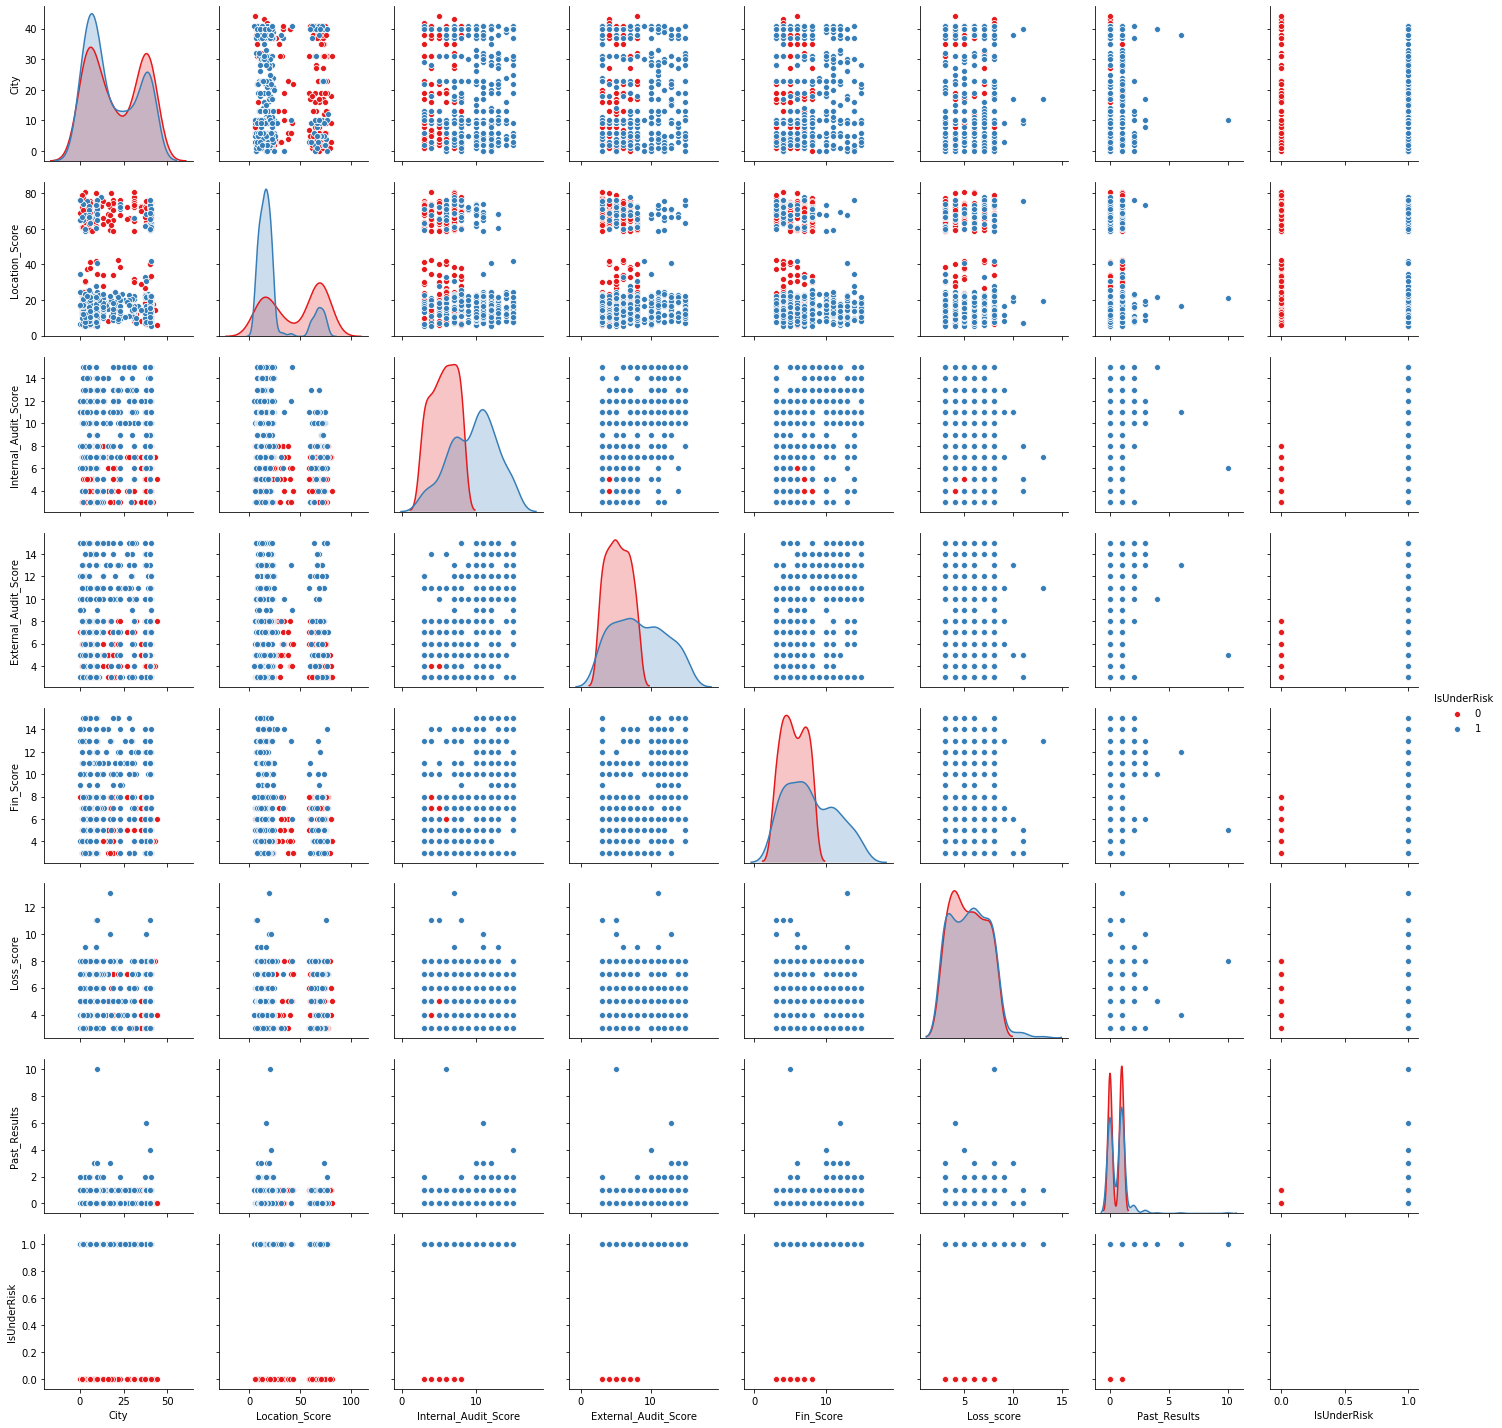

In [10]:
sns.pairplot(data_train,hue='IsUnderRisk',palette='Set1')

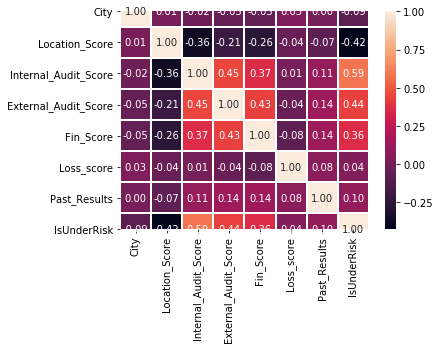

In [11]:
#fig,ax=plt.subplots(figsize=(20,20))
data_corr = data_train.corr()
sns.heatmap(data_corr,annot=True,fmt=".2f",linewidth=1.0,square=1)
plt.show()

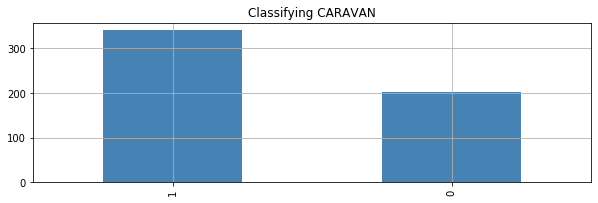

In [12]:
fig = plt.figure(figsize=(10,10))

# Tells the total count of different values in CARAVAN
plt.subplot(3,1,1)
data_train['IsUnderRisk'].value_counts().plot(kind='bar', title='Classifying CARAVAN', color='steelblue', grid=True)

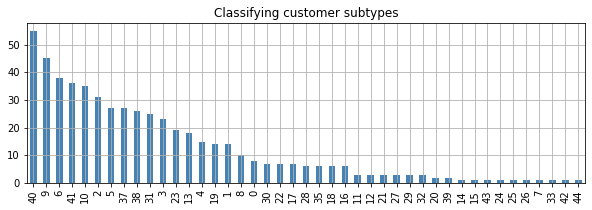

In [13]:
fig = plt.figure(figsize=(10,10))
# Tells the total count of different values in customer subtype
plt.subplot(3,1,2)
data_train['City'].value_counts().plot(kind='bar', align='center', title='Classifying customer subtypes', color='steelblue', grid=True)

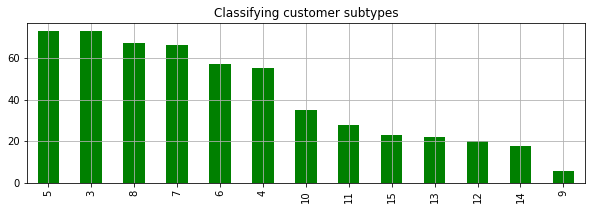

In [14]:
fig = plt.figure(figsize=(10,10))
# Tells the total count of different values in customer subtype
plt.subplot(3,1,2)
data_train['External_Audit_Score'].value_counts().plot(kind='bar', align='center', title='Classifying customer subtypes', color="g", grid=True)

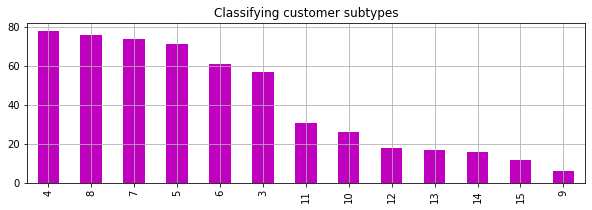

In [15]:
fig = plt.figure(figsize=(10,10))
# Tells the total count of different values in customer subtype
plt.subplot(3,1,2)
data_train['Fin_Score'].value_counts().plot(kind='bar', align='center', title='Classifying customer subtypes', color="m", grid=True)

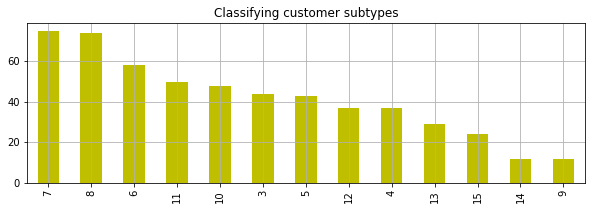

In [16]:
fig = plt.figure(figsize=(10,10))
# Tells the total count of different values in customer subtype
plt.subplot(3,1,2)
data_train['Internal_Audit_Score'].value_counts().plot(kind='bar', align='center', title='Classifying customer subtypes', color="y", grid=True)


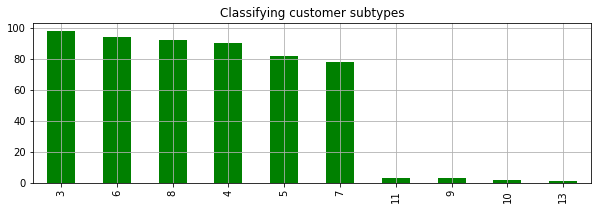

In [17]:
fig = plt.figure(figsize=(10,10))
# Tells the total count of different values in customer subtype
plt.subplot(3,1,2)
data_train['Loss_score'].value_counts().plot(kind='bar', align='center', title='Classifying customer subtypes', color="g", grid=True)


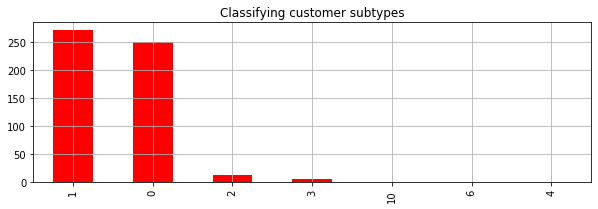

In [18]:
fig = plt.figure(figsize=(10,10))
# Tells the total count of different values in customer subtype
plt.subplot(3,1,2)
data_train['Past_Results'].value_counts().plot(kind='bar', align='center', title='Classifying customer subtypes', color="r", grid=True)


Text(0, 0.5, 'Risk')

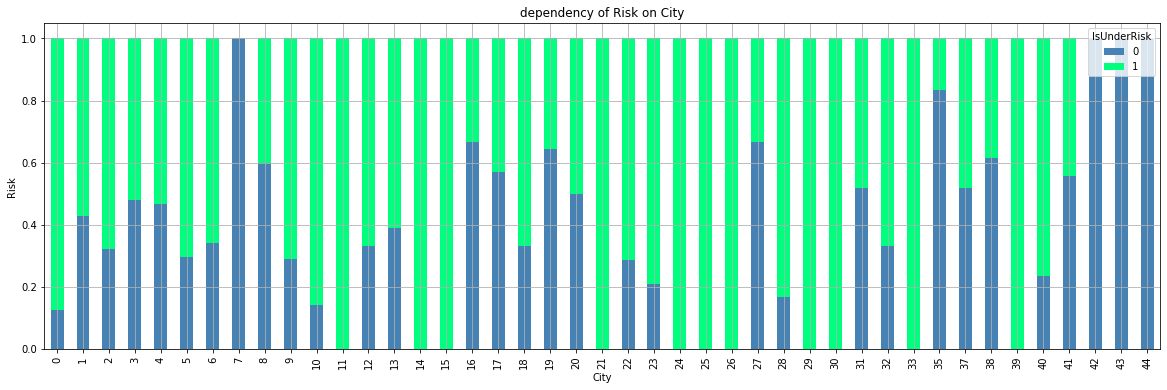

In [36]:

age_caravan = pd.crosstab(data_train['City'], data_train['IsUnderRisk'])
age_caravan_pct = age_caravan.div(age_caravan.sum(1).astype(float),axis=0)
age_caravan_pct.plot(figsize=(20,6), kind='bar', stacked=True, color=['steelblue', 'springgreen'], title='dependency of Risk on City', grid=True)
plt.xlabel('City')
plt.ylabel('Risk')

# Logistic 

In [19]:
#Define model
logreg=LogisticRegression()

In [37]:
#Fit model
logreg.fit(x_train,y_train) #order is important here. (independent, dependent)

logr=LogisticRegression(penalty="l1",class_weight="balanced",random_state=2)

logr.fit(x_train,y_train)

log_p_test=logr.predict(x_test)

# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, log_p_test)))
print('Precision: {:.2f}'.format(precision_score(y_test, log_p_test)))
print('Recall: {:.2f}'.format(recall_score(y_test, log_p_test)))
print('F1: {:.2f}'.format(f1_score(y_test, log_p_test)))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, log_p_test)

# calculate AUC
auc = roc_auc_score(y_test, log_p_test)
print('AUC: %.3f' % auc)

C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.81
Precision: 0.90
Recall: 0.73
F1: 0.81
AUC: 0.816


C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
from sklearn.metrics import log_loss
log_loss(y_test,log_p_test)

6.654296351195185

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.876


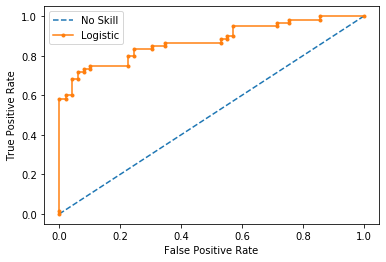

In [21]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# predict probabilities
lr_probs = logr.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Normalization

In [22]:
# data normalization with sklearn

from sklearn.preprocessing import MinMaxScaler



# fit scaler on training data

norm = MinMaxScaler().fit(x_train)



# transform training data

x_train_norm = norm.transform(x_train)



# transform testing dataabs

x_test_norm = norm.transform(x_test)

C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.82
Precision: 0.92
Recall: 0.73
F1: 0.81
AUC: 0.826
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.873


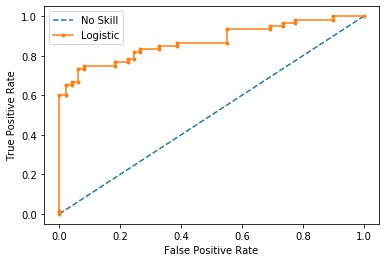

In [23]:
logr_n=LogisticRegression(penalty="l1",class_weight="balanced",random_state=2)

logr_n.fit(x_train_norm,y_train)

log_p_test_norm=logr_n.predict(x_test_norm)


# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, log_p_test_norm)))
print('Precision: {:.2f}'.format(precision_score(y_test, log_p_test_norm)))
print('Recall: {:.2f}'.format(recall_score(y_test, log_p_test_norm)))
print('F1: {:.2f}'.format(f1_score(y_test, log_p_test_norm)))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, log_p_test_norm)

# calculate AUC
auc = roc_auc_score(y_test, log_p_test_norm)
print('AUC: %.3f' % auc)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# predict probabilities
lr_probs = logr_n.predict_proba(x_test_norm)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### Standardization

In [24]:
# data standardization with  sklearn

from sklearn.preprocessing import StandardScaler



# copy of datasets

x_train_stand = x_train.copy()

x_test_stand = x_test.copy()



# numerical features
col=data_train.columns
col=col.drop(['IsUnderRisk'],1)
num_cols =col.copy()



# apply standardization on numerical features

for i in num_cols:

    

    # fit on training data column

    scale = StandardScaler().fit(x_train_stand[[i]])

    

    # transform the training data column

    x_train_stand[i] = scale.transform(x_train_stand[[i]])

    

    # transform the testing data column

    x_test_stand[i] = scale.transform(x_test_stand[[i]])

In [25]:
#Define model
logreg_stand=LogisticRegression()

#Fit model
logreg_stand.fit(x_train_stand,y_train) #order is important here. (independent, dependent)
log_p_test_stand=logr.predict(x_test)
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, log_p_test_stand)))
print('Precision: {:.2f}'.format(precision_score(y_test, log_p_test_stand)))
print('Recall: {:.2f}'.format(recall_score(y_test, log_p_test_stand)))
print('F1: {:.2f}'.format(f1_score(y_test, log_p_test_stand)))
# calculate AUC
auc = roc_auc_score(y_test, log_p_test_stand)
print('AUC: %.3f' % auc)

Accuracy: 0.81
Precision: 0.90
Recall: 0.73
F1: 0.81
AUC: 0.816


C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
log_grid=LogisticRegression(class_weight='balanced')

param= {'C':[0.0001,0.0003,0.0005,0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,4,5,10,20]}

clf=GridSearchCV(log_grid,param,scoring='roc_auc',refit=True,cv=10)

clf.fit(x_train,y_train)

print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

log_p_test_grid=clf.predict(x_test)


# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, log_p_test_grid)))
print('Precision: {:.2f}'.format(precision_score(y_test, log_p_test_grid)))
print('Recall: {:.2f}'.format(recall_score(y_test, log_p_test_grid)))
print('F1: {:.2f}'.format(f1_score(y_test, log_p_test_grid)))

# calculate AUC
auc = roc_auc_score(y_test, log_p_test_grid)
print('AUC: %.3f' % auc)

C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Best roc_auc: 0.9011, with best C: {'C': 20}
Accuracy: 0.81
Precision: 0.90
Recall: 0.73
F1: 0.81
AUC: 0.816


C:\Users\somya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\somya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.872


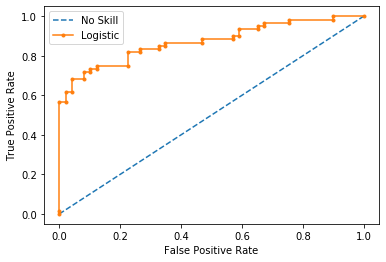

In [28]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,log_p_test_grid)



# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# predict probabilities
lr_probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
log_grid=LogisticRegression(class_weight='balanced')

param= {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,4,5,10,20]}

clf_norm=GridSearchCV(log_grid,param,scoring='roc_auc',refit=True,cv=10)

clf_norm.fit(x_train_norm,y_train)

print('Best roc_auc: {:.4}, with best C: {}'.format(clf_norm.best_score_, clf_norm.best_params_))

log_p_test_norm_grid_norm=clf_norm.predict(x_test_norm)


# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, log_p_test_norm_grid_norm)))
print('Precision: {:.2f}'.format(precision_score(y_test, log_p_test_norm_grid_norm)))
print('Recall: {:.2f}'.format(recall_score(y_test, log_p_test_norm_grid_norm)))
print('F1: {:.2f}'.format(f1_score(y_test, log_p_test_norm_grid_norm)))

# calculate AUC
auc = roc_auc_score(y_test, log_p_test_norm_grid_norm)
print('AUC: %.3f' % auc)

In [ ]:
log_grid=LogisticRegression(class_weight='balanced')

param= {'C':[0.0001,0.0003,0.0005,0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,4,5,10,20]}

clf_stand=GridSearchCV(log_grid,param,scoring='roc_auc',refit=True,cv=10)

clf_stand.fit(x_train_stand,y_train)

print('Best roc_auc: {:.4}, with best C: {}'.format(clf_stand.best_score_, clf_stand.best_params_))

log_p_test_stand_grid=clf_stand.predict(x_test_stand)


# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, log_p_test_stand_grid)))
print('Precision: {:.2f}'.format(precision_score(y_test, log_p_test_stand_grid)))
print('Recall: {:.2f}'.format(recall_score(y_test, log_p_test_stand_grid)))
print('F1: {:.2f}'.format(f1_score(y_test, log_p_test_stand_grid)))

# calculate AUC
auc = roc_auc_score(y_test, log_p_test_stand_grid)
print('AUC: %.3f' % auc)

In [ ]:
log_grid=LogisticRegression(class_weight='balanced')
param= {'C':[0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,4,5,10,20]}

clf=GridSearchCV(log_grid,param,scoring='roc_auc',refit=True,cv=15)

clf.fit(x_train,y_train)

log1_p_test_grid=clf.predict(x_test)


# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, log1_p_test_grid)))
print('Precision: {:.2f}'.format(precision_score(y_test, log1_p_test_grid)))
print('Recall: {:.2f}'.format(recall_score(y_test, log1_p_test_grid)))
print('F1: {:.2f}'.format(f1_score(y_test, log1_p_test_grid)))
# calculate AUC
auc = roc_auc_score(y_test, log1_p_test_grid)
print('AUC: %.3f' % auc)

In [ ]:
log_grid=LogisticRegression(class_weight='balanced',penalty='l1')
param= {'C':[0.0001,0.0003,0.0005,0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,4,5,10,20]}

clf=GridSearchCV(log_grid,param,scoring='roc_auc',refit=True,cv=15)

clf.fit(x_train,y_train)

log2_p_test=clf.predict(x_test)


# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, log2_p_test)))
print('Precision: {:.2f}'.format(precision_score(y_test, log2_p_test)))
print('Recall: {:.2f}'.format(recall_score(y_test, log2_p_test)))
print('F1: {:.2f}'.format(f1_score(y_test, log2_p_test)))
# calculate AUC
auc = roc_auc_score(y_test, log2_p_test)
print('AUC: %.3f' % auc)

In [ ]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, p_test)

# calculate AUC
auc = roc_auc_score(y_test, p_test)
print('AUC: %.3f' % auc)

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# predict probabilities
lr_probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Define Model
dt=DecisionTreeClassifier(random_state=1)

#fit model
dt.fit(x_train, y_train)

In [ ]:
#Prediction with test value

DT_p_test=dt.predict(x_test)
#dt_prediction
dt_score=accuracy_score(y_test,DT_p_test)
dt_score

In [ ]:
#Prediction with train value

dt_p_test=dt.predict(x_train)
#dt_prediction
dt_score=accuracy_score(y_train,dt_p_test)
dt_score

In [ ]:
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, DT_p_test)))
print('Precision: {:.2f}'.format(precision_score(y_test, DT_p_test)))
print('Recall: {:.2f}'.format(recall_score(y_test, DT_p_test)))
print('F1: {:.2f}'.format(f1_score(y_test, DT_p_test)))

In [ ]:
# calculate AUC
auc = roc_auc_score(y_test,DT_p_test)
print('AUC: %.4f' % auc)

In [ ]:
# creating a decision tree class object
dtree=DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=15,
                                  class_weight="balanced")

dtree.fit(x_train,y_train)

DTpredicted=dtree.predict(x_test)

df_test=pd.DataFrame(list(zip(y_test,predicted)),columns=["real","predicted"])

k=pd.crosstab(df_test['real'],df_test["predicted"])


TP=k.iloc[1,1]
TN=k.iloc[0,0]
FP=k.iloc[0,1]
FN=k.iloc[1,0]
P=TP+FN
N=TN+FP


print('Accuracy is :',(TP+TN)/(P+N))
print('Sensitivity is :',TP/P)
print('Specificity is :',TN/N)


# calculate AUC
auc = roc_auc_score(y_test,DTpredicted)
print('AUC: %.3f' % auc)

print('F1: {:.2f}'.format(f1_score(y_test, DTpredicted)))

In [ ]:
#Define Model
rfc=RandomForestClassifier()

#fit the best algorithm 
rfc.fit(x_train,y_train)

In [ ]:
#Prediction with test value

rf_prediction=rfc.predict(x_test)
rf_prediction.shape

In [ ]:
#rf_prediction
rf_score=accuracy_score(y_test,rf_prediction)
print(rf_score)

In [ ]:
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,rf_prediction)))
print('Precision: {:.2f}'.format(precision_score(y_test,rf_prediction)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_prediction)))
print('F1: {:.2f}'.format(f1_score(y_test,rf_prediction)))
# calculate AUC
auc = roc_auc_score(y_test,rf_prediction)
print('AUC: %.4f' % auc)

In [ ]:
x_train.shape

In [ ]:
import numpy as np

from time import time
from operator import itemgetter
from scipy.stats import randint as sp_randint

from sklearn.model_selection import RandomizedSearchCV


clf = RandomForestClassifier(verbose=1,n_jobs=-1)
# this here is the base classifier we are going to try
# we will be supplying different parameter ranges to our randomSearchCV which in turn
# will pass it on to this classifier

# Utility function to report best scores. This simply accepts grid scores from 
# our randomSearchCV/GridSearchCV and picks and gives top few combination according to 
# their scores

def report(grid_scores, n_top=3):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    # above line selects top n grid scores
    # for loop below , prints the rank, score and parameter combination
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

In [ ]:
    
# RandomSearchCV/GridSearchCV accept parameters values as dictionaries.
# In example given below we have constructed dictionary for 
#different parameter values that we want to
# try for randomForest model
param_dist = {"n_estimators":[10,100,500],
              "max_depth": [3,5, None],
              "max_features": sp_randint(5, 7),
              "min_samples_split": sp_randint(5, 11),
              "min_samples_leaf": sp_randint(5, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
# run randomized search
n_iter_search = 50
# n_iter parameter of RandomizedSeacrhCV controls, how many 
# parameter combination will be tried; out of all possible given values

random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)
random_search.fit(x_train, y_train)
#print(getattr(random_search, 'best_scores_', None))
#report(random_search.best_score_)
report(random_search.best_score_)

In [ ]:
random_search.best_params_

In [ ]:
rf=RandomForestClassifier(n_estimators=500,verbose=1,criterion='entropy',min_samples_split=7,
                         bootstrap=False,max_depth=None,max_features=8,min_samples_leaf=5,
                          class_weight="balanced")

In [ ]:
rf.fit(x_train,y_train)

predicted=rf.predict(x_test)

df_test=pd.DataFrame(list(zip(y_test,predicted)),columns=["real","predicted"])

k=pd.crosstab(df_test['real'],df_test["predicted"])
print(k)

TP=k.iloc[1,1]
TN=k.iloc[0,0]
FP=k.iloc[0,1]
FN=k.iloc[1,0]
P=TP+FN
N=TN+FP

print(TP,TN,FP,FN)
print('Accuracy is :',(TP+TN)/(P+N))
print('Sensitivity is :',TP/P)
print('Specificity is :',TN/N)

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, list(x_train.columns)[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), list(x_train.columns))
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

x_train.shape

gbm_params={'n_estimators':[50,100,200,500,700],
           'learning_rate': [0.01,.05,0.1,0.4,0.8,1],
            'max_depth':[1,2,3,4,5,6],
             'min_samples_split':[2,5,10,20],
             'min_samples_leaf':[2,5,10,20],
            'subsample':[0.5,0.8,1],
            'max_features':[1,2,3,4,5,6,7]
           }


gbm=GradientBoostingClassifier()

random_search1=RandomizedSearchCV(gbm,scoring='roc_auc',param_distributions=gbm_params,
                                 cv=5,n_iter=10,
                                 n_jobs=-1)

random_search1.fit(x_train,y_train)
# this might take upto 30-45 miins to finish , if you try cv=10 and larger number for n_iter
# ( dont be impatient :) . Also dont be alarmed if it finishes early :))

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.5f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

report(random_search.cv_results_,5)

In [ ]:
    
# RandomSearchCV/GridSearchCV accept parameters values as dictionaries.
# In example given below we have constructed dictionary for 
#different parameter values that we want to
# try for randomForest model
param_dist = {"n_estimators":[10,100,500],
              "max_depth": [3,5, None],
              "max_features": sp_randint(5, 7),
              "min_samples_split": sp_randint(5, 11),
              "min_samples_leaf": sp_randint(5, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
# run randomized search
n_iter_search = 50
# n_iter parameter of RandomizedSeacrhCV controls, how many 
# parameter combination will be tried; out of all possible given values

random_search = RandomizedSearchCV(gbm,bootstrap=True,criterion=entropy,max_depth=None,,
                                   n_iter=n_iter_search)
random_search.fit(x_train, y_train)
#print(getattr(random_search, 'best_scores_', None))
#report(random_search.best_score_)
report(random_search.best_score_)

In [ ]:
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, p_test)))
print('Precision: {:.2f}'.format(precision_score(y_test, p_test)))
print('Recall: {:.2f}'.format(recall_score(y_test, p_test)))
print('F1: {:.2f}'.format(f1_score(y_test, p_test)))
# calculate AUC
auc = roc_auc_score(y_test,rf_prediction)
print('AUC: %.4f' % auc)

In [ ]:
#Define model
xgboost=xgb.XGBClassifier(max_depth=3,n_estimators=300,learning_rate=0.05)

#Fit model
xgboost.fit(x_train,y_train)

In [ ]:
#Prediction with test value

xgboost_prediction=xgboost.predict(x_test)
#rf_prediction
xgboost_score=accuracy_score(y_test,xgboost_prediction)
print(xgboost_score)

In [ ]:
#Prediction with train value

xgboost_train_prediction=xgboost.predict(x_train)
#rf_prediction
xgboost_score=accuracy_score(y_train,xgboost_prediction)
print(xgboost_score)

In [ ]:
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, xgboost_prediction)))
print('Precision: {:.2f}'.format(precision_score(y_test, xgboost_prediction)))
print('Recall: {:.2f}'.format(recall_score(y_test, xgboost_prediction)))
print('F1: {:.2f}'.format(f1_score(y_test, xgboost_prediction)))
# calculate AUC
auc = roc_auc_score(y_test,rf_prediction)
print('AUC: %.4f' % auc)

In [ ]:
### Sequential Parameter Tuning### Sequential Parameter Tuning

xgb_params = {  
                "n_estimators":[100,500,700,900,1000,1200,1500]
             }

xgb1=XGBClassifier(learning_rate=0.1,subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8)

from sklearn.model_selection import GridSearchCV

grid_search=GridSearchCV(xgb1,cv=5,param_grid=xgb_params,scoring='roc_auc',verbose=2,n_jobs=-1)

grid_search.fit(x_train,y_train)

report(grid_search.cv_results_,3)

In [ ]:
xgb_params={
            "gamma":[0,2,5,8,10],
            "max_depth": [2,3,4,5,6,7,8],
            "min_child_weight":[0.5,1,2,5,10]
            }

xgb2=XGBClassifier(learning_rate=0.1,n_estimators=500,subsample=0.8,colsample_bylevel=0.8,colsample_bytree=0.8)

random_search=RandomizedSearchCV(xgb2,param_distributions=xgb_params,n_iter=20,cv=5,scoring='roc_auc',
                                 n_jobs=-1,verbose=2)

random_search.fit(x_train,y_train)

report(random_search.cv_results_,3)

In [ ]:
# Accuracy = TP + TN / (TP + TN + FP + FN)
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)  Also known as sensitivity, or True Positive Rate
# F1 = 2 * Precision * Recall / (Precision + Recall) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, p_test)))
print('Precision: {:.2f}'.format(precision_score(y_test, p_test)))
print('Recall: {:.2f}'.format(recall_score(y_test, p_test)))
print('F1: {:.2f}'.format(f1_score(y_test, p_test)))
# calculate AUC
auc = roc_auc_score(y_test,rf_prediction)
print('AUC: %.4f' % auc)